In [202]:
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage.morphology as m
from skimage.color import rgb2gray
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage.color import label2rgb
from random import random
import matplotlib

In [260]:
colors = [(0,0,0)] 
for i in range(255):
    if i%25==0 and i >= 50:
        colors.append((i/255,random(),random()))
for i in range(255):
    if i%25==0 and i >= 50:
        colors.append((random(),i/255,random()))
for i in range(255):
    if i%25==0 and i >= 50:
        colors.append((random(),random(),i/255))

new_map = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=27)

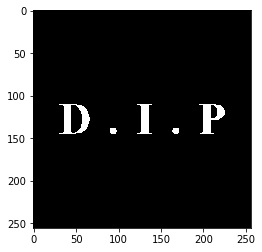

In [226]:
img2 = rgb2gray(plt.imread('imgs/DIP.tif'))
thresh = threshold_otsu(img2)
binary = rgb2gray(img2 > thresh)
plt.gray()
plt.imshow(binary)

5


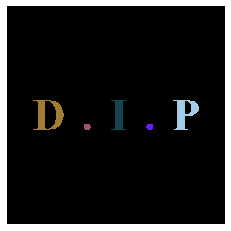

In [261]:
def FindPixel(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] > 0:
                img2 = np.zeros((img.shape[0], img.shape[1]))
                img2[i][j] = img[i][j]
                return img2
    return np.zeros(1)

def connectedExtraction (img, imgE):
    SE = m.square(3)
    imgO = np.logical_and(m.dilation(imgE, SE), img)
    imgTemp = np.ones(1)
    while(not (imgO==imgTemp).all()):
        imgTemp = np.logical_and(m.dilation(imgO, SE), img)
        imgO = np.logical_and(m.dilation(imgTemp, SE), img)
    return imgO

def ExtractAndLabelComponents(img):
    components = []
    imgP = FindPixel(img)
    while imgP.shape[0] != 1: #extract
        components.append(connectedExtraction(img, imgP))
        img = np.bitwise_xor(img,components[len(components)-1])
        imgP = FindPixel(img)
    for i in range(len(components)): #label
        components[i] = np.multiply(components[i], i+1)
    return components

c = ExtractAndLabelComponents(binary)
l = c[0] + c[1] + c[2] + c[3] + c[4]
print(len(c))
plt.axis('off')
plt.imshow(l, cmap=new_map)

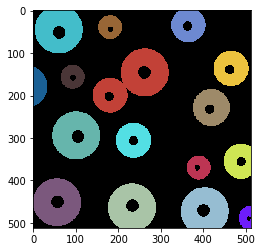

In [262]:
img22 = rgb2gray(plt.imread('imgs/balls-with-reflections.tif'))
thresh = threshold_otsu(img22)
binary2 = rgb2gray(img22 > thresh)
c2 = ExtractAndLabelComponents(binary2)
l2 = c2[0]
for i in range(len(c2)-1):
    l2 += c2[i+1]
labelled2 = measure.label(binary2)
plt.imshow(l2, cmap=new_map)

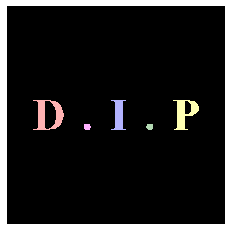

In [83]:
from skimage import measure
labelled = measure.label(binary)
comparison = label2rgb(labelled, image=binary, bg_label=0)
plt.axis('off')
plt.imshow(comparison)

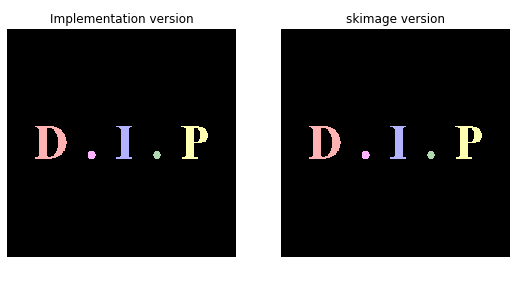

In [263]:
fig, axs = plt.subplots(1,2,figsize=(9,5))
[axi.set_axis_off() for axi in axs.ravel()]
axs[0] = fig.add_subplot(1,2,1)
axs[0].set_title("Implementation version")
axs[0].imshow(image_label_overlay,  vmin = 0, vmax= 255)
plt.axis('off')
axs[1] = fig.add_subplot(1,2,2)
axs[1].set_title("skimage version")
axs[1].imshow(comparison,  vmin = 0, vmax= 255)
plt.axis('off')
fig.savefig("imgs/2c.jpg")

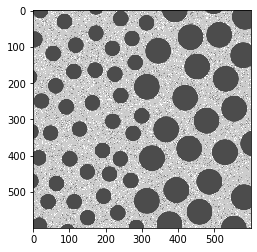

In [130]:
img3 = rgb2gray(plt.imread('imgs/blobs.tif'))
plt.imshow(img3, vmin=0, vmax=255)

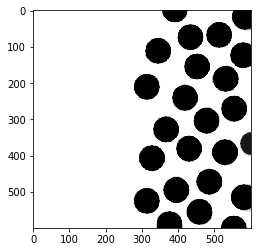

In [109]:
SE = m.disk(28)
img31 = m.closing(img3, SE)
plt.imshow(img31)

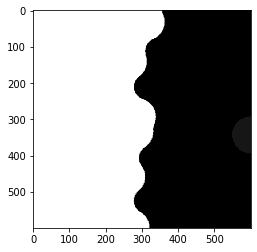

In [110]:
SE2 = m.disk(50)
img32 = m.opening(img31, SE2)
plt.imshow(img32)

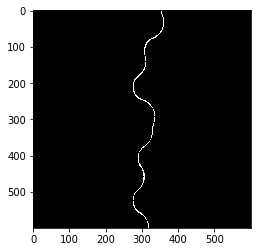

In [155]:
thresh3 = threshold_otsu(img32)
imgBoundary = img32 - m.erosion(img32, m.disk(5)) > thresh3
plt.imshow(imgBoundary)

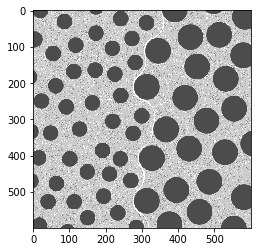

In [156]:
output = np.multiply(imgBoundary,255)+img3
plt.imshow(output, vmin=0, vmax=255)

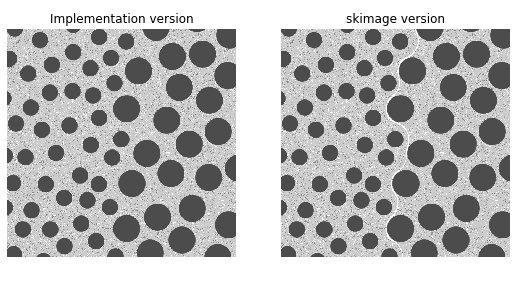

In [265]:
fig, axs = plt.subplots(1,2,figsize=(9,5))
[axi.set_axis_off() for axi in axs.ravel()]
axs[0] = fig.add_subplot(1,2,1)
axs[0].set_title("Implementation version")
axs[0].imshow(img3,  vmin = 0, vmax= 255)
plt.axis('off')
axs[1] = fig.add_subplot(1,2,2)
axs[1].set_title("skimage version")
axs[1].imshow(output,  vmin = 0, vmax= 255)
plt.axis('off')
fig.savefig("imgs/2c.jpg")

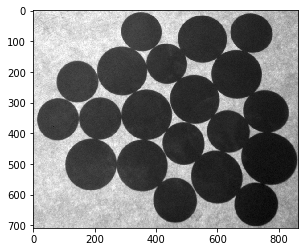

In [157]:
img4 = plt.imread('imgs/coins.png')
plt.imshow(img4)

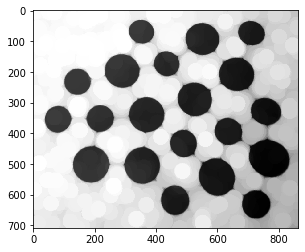

In [168]:
SE = m.disk(25)
img41 = m.dilation(img4, SE)
plt.imshow(img41)

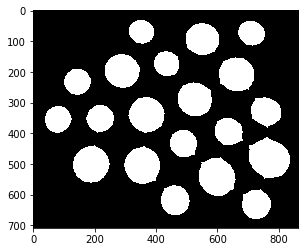

In [170]:
thresh4 = threshold_otsu(img41)
binary4 = img41 < thresh4
plt.imshow(binary4)

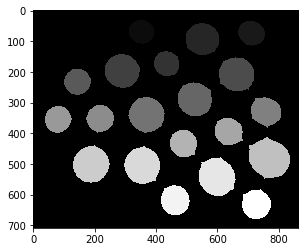

In [174]:
c4 = ExtractAndLabelComponents(binary4)
l4 = c4[0]
for i in range(len(c4)-1):
    l4 += c4[i+1]
plt.imshow(l4)


20


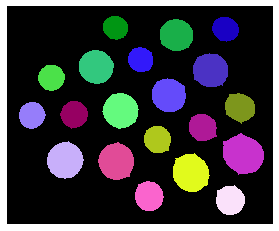

In [241]:
print(len(c4))
plt.axis('off')
plt.imshow(l4, cmap=new_map)